## Операционный отчет за исторический пориод

In [1]:
import pandas as pd
from calendar import monthrange
# import seaborn as sns
# import matplotlib.pyplot as plt
# from datetime import datetime
import datetime as dt
from pandas.tseries.offsets import DateOffset
# import re
import numpy as np
import time

import bamboolib

import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 900
png_renderer.height = 600
pio.renderers.default = "png"

# pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_table(r"\\Keenetic-5974\новый том\1 Courses\1 Yandex.Praktikum\1 YP\0001 Tengiz\Files\order-30-09-22.16-58_707b78.csv", sep=' ', on_bad_lines='skip').replace('\\', '/')

df = df[['Контактный телефон', 'Сумма', 'Дата доставки', 'Метро', 'Дата и время']]
df = df.rename(columns={'Контактный телефон': 'phone', 'Сумма': 'price', 'Метро': 'metro', 'Дата доставки': 'delivery_date', 'Дата и время': 'order_date'})

In [3]:
df = df.query('phone.notna() and delivery_date.notna()')
import pandas as pd; import numpy as np
# Step: Change data type of delivery_date to Datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y %H:%M')

# Step: Change data type of order_date to Datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%d.%m.%Y')

# Step: Extract datetime attribute(s) hour from 'order_date'
df['order_date_hour'] = df['order_date'].dt.hour

# Step: Extract datetime attribute(s) day of week number from 'order_date'
df['order_date_dayofweek'] = df['order_date'].dt.dayofweek + 1

df = df.rename(columns={'order_date_hour': 'od_hour', 'order_date_dayofweek': 'odate_d_week'})

# выделение номера телефона
def phone(col):
    ph_num = ''
    for i in col:
        if i.isdigit():
            ph_num += i
    if ph_num == '':
        return np.nan
    else: return ph_num

df['phone_n'] = df.phone.apply(phone)

df = df.drop(columns=['phone'])

# Step: Rename column
df = df.rename(columns={'phone_n': 'phone'})

In [4]:
# print(f'начальная дата: {df.order_date.min()}')
# print(f'конечная дата: {df.order_date.max()}')
# print(f'кол-во уникальных клиентов: {df.phone.nunique()}')
# print(f'кол-во заказов: {df.phone.shape[0]}')

In [5]:
df_metro = df.groupby('metro').agg({'phone':'count', 'price':'sum'})

import pandas as pd; import numpy as np
df_metro = df_metro.reset_index()
df_metro = df_metro.loc[~df_metro['metro'].isin(["\'=", '11', 'Автово', '111', 'Люберцы' , 'уточнят'])]

import pandas as pd; import numpy as np
# Step: Rename multiple columns
df_metro = df_metro.rename(columns={'phone': 'cnt', 'price': 'sum_'})

df_metro['cnt_share'] = round((df_metro.cnt / df_metro.cnt.sum())*100, 2)
df_metro['sum_share'] = round((df_metro.sum_ / df_metro.sum_.sum())*100, 2)

## Кол-во заказов по станциям метро <a class='anchor' id='Кол-во_заказов_по_станциям_метро'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


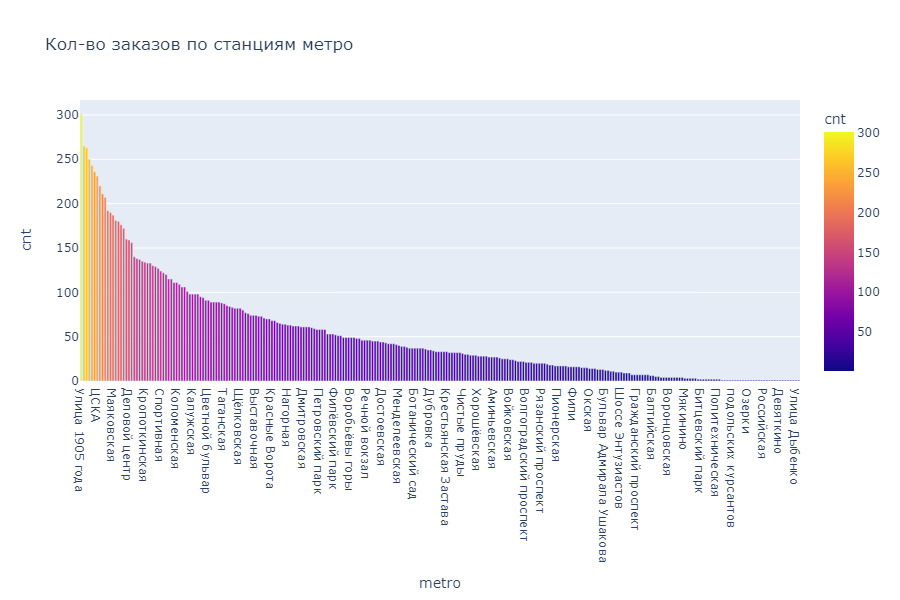

In [6]:
import pandas as pd; import numpy as np
# Step: Sort column(s) cnt descending (Z-A)
df_metro = df_metro.sort_values(by=['cnt'], ascending=[False])

import plotly.express as px
fig = px.bar(df_metro, x='metro', y='cnt', color='cnt', title='Кол-во заказов по станциям метро', width=900, height=600)
fig

## Выручка по станциям метро <a class='anchor' id='Выручка_по_станциям_метро'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


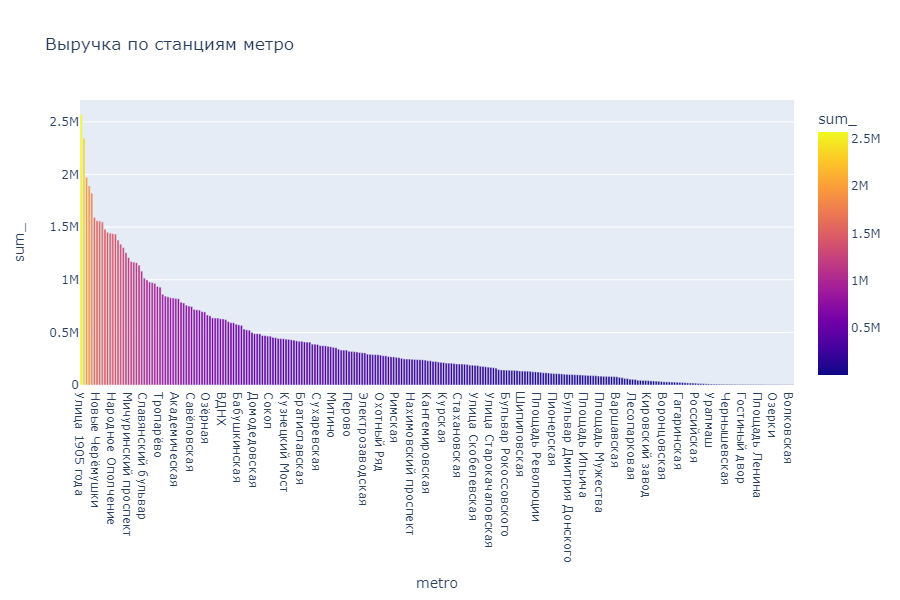

In [7]:
import pandas as pd; import numpy as np
# Step: Sort column(s) sum_ descending (Z-A)
df_metro = df_metro.sort_values(by=['sum_'], ascending=[False])

import plotly.express as px
fig = px.bar(df_metro, x='metro', y='sum_', color='sum_', title='Выручка по станциям метро', width=900, height=600)
fig

## Доля заказов по станциям метро, % <a class='anchor' id='Доля_заказов_по_станциям_метро,_%'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


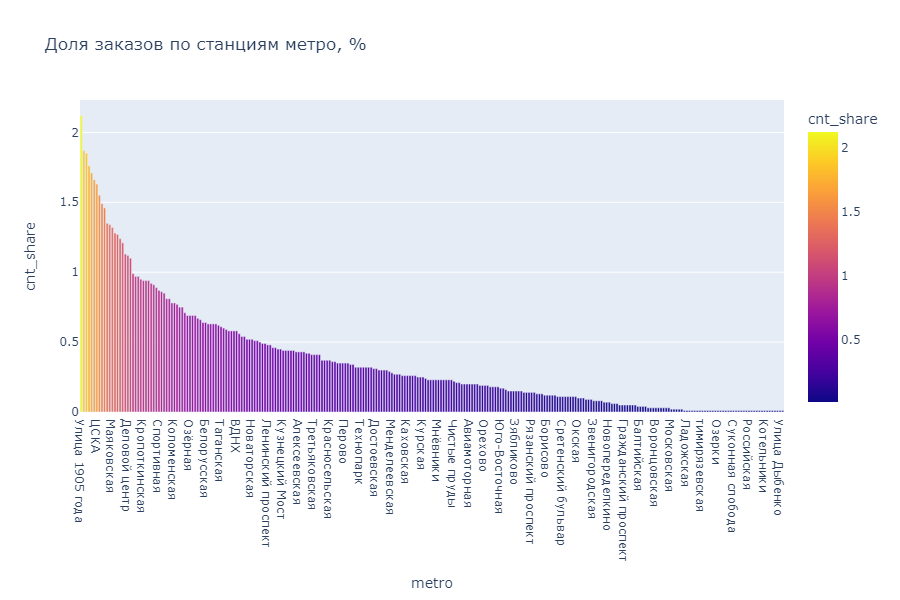

In [8]:
import pandas as pd; import numpy as np
# Step: Sort column(s) cnt_share descending (Z-A)
df_metro = df_metro.sort_values(by=['cnt_share'], ascending=[False])

import plotly.express as px
fig = px.bar(df_metro, x='metro', y='cnt_share', color='cnt_share', title='Доля заказов по станциям метро, %', width=900, height=600)
fig

## Доля выручки по станциям метро, % <a class='anchor' id='Доля_выручки_по_станциям_метро,_%'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


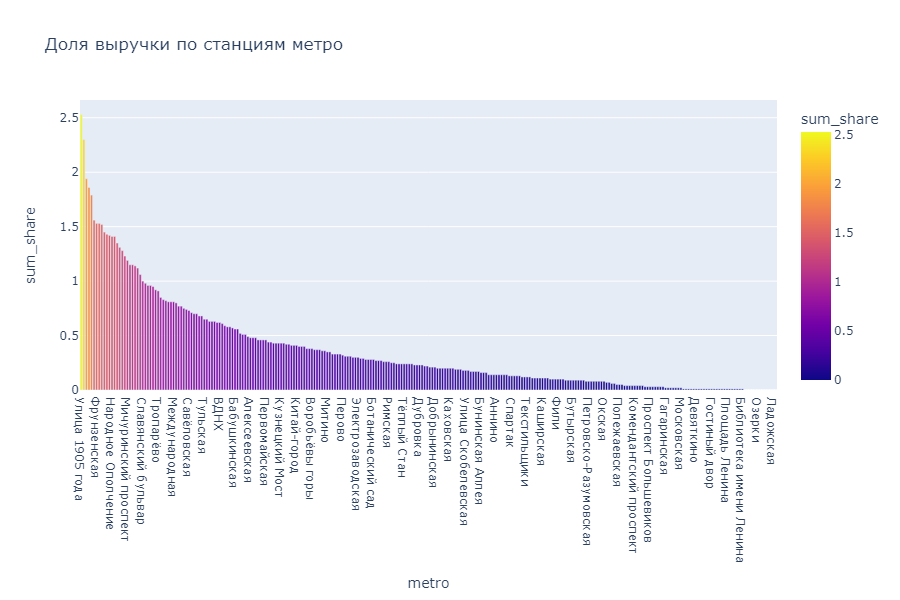

In [9]:
import pandas as pd; import numpy as np
# Step: Sort column(s) sum_share descending (Z-A)
df_metro = df_metro.sort_values(by=['sum_share'], ascending=[False])

import plotly.express as px
fig = px.bar(df_metro, x='metro', y='sum_share', color='sum_share', title='Доля выручки по станциям метро', width=900, height=600)
fig

## Перспективные станции <a class='anchor' id='Перспективные_станции'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


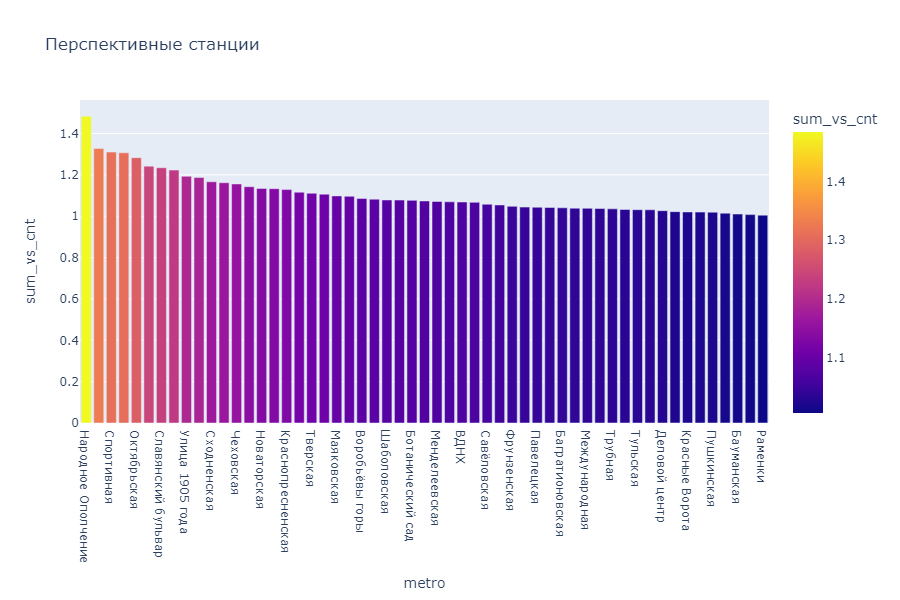

In [10]:
# соотношение долей выручки и кол-ва заказов
df_metro['sum_vs_cnt'] = round((df_metro.sum_share / df_metro.cnt_share), 4)
# вывод станций, где соотношение долей больше 1 и доля заказов больше медианной
df_metro_plus = df_metro.query('sum_vs_cnt > 1 and cnt_share > cnt_share.median()')
import pandas as pd; import numpy as np
# Step: Sort column(s) sum_vs_cnt descending (Z-A)
df_metro_plus = df_metro_plus.sort_values(by=['sum_vs_cnt'], ascending=[False])

import plotly.express as px
fig = px.bar(df_metro_plus, x='metro', y='sum_vs_cnt', color='sum_vs_cnt', title='Перспективные станции', width=900, height=600)
fig

In [11]:
# print(df_metro_plus.shape[0])
# ', '.join(list(df_metro_plus.metro))

### **Вывод:**
* Максимальная выручка поступает от клиентов у станции метро «Улица 1905 года», как наибольшее число клиентов
* Лучшие показатели по кол-ву клиентов и выручке у клиентов на следующих станциях: *`Народное Ополчение, Проспект Ветеранов, Спортивная, Смоленская, Октябрьская, Минская, Славянский бульвар, Кропоткинская, Улица 1905 года, Сухаревская, Сходненская, Филёвский парк, Чеховская, Домодедовская, Новаторская, Щукинская, Краснопресненская, Алексеевская, Тверская, Полянка, Маяковская, Выставочная, Воробьёвы горы, Крылатское, Шаболовская, Арбатская, Ботанический сад, Жулебино, Менделеевская, Беговая, ВДНХ, Киевская, Савёловская, Парк культуры, Фрунзенская, Проспект Вернадского, Павелецкая, Парк Победы, Багратионовская, Строгино, Международная, Ломоносовский проспект, Трубная, Таганская, Тульская, Студенческая, Деловой центр, Первомайская, Красные Ворота, Шелепиха, Пушкинская, Аэропорт, Бауманская, Университет, Раменки`*


## Кол-во заказов в месяц <a class='anchor' id='Кол-во_заказов_в_месяц'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


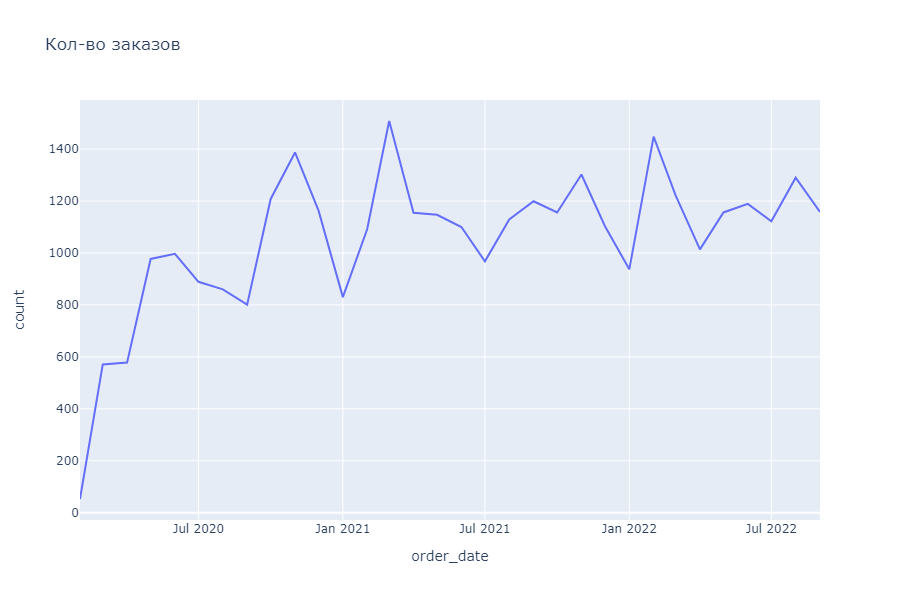

In [12]:

import pandas as pd; import numpy as np
# Step: Change data type of order_date to Datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y %H:%M')

# Step: Change datetime frequency
df_mo = df.set_index('order_date').resample('1MS').size().to_frame(name='count').reset_index()

import plotly.express as px
fig = px.line(df_mo.sort_values(by=['order_date'], ascending=[True]), x='order_date', y='count', title='Кол-во заказов', width=900, height=600)
fig

## Доля заказов по дням недели <a class='anchor' id='Доля_заказов_по_дням_недели'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


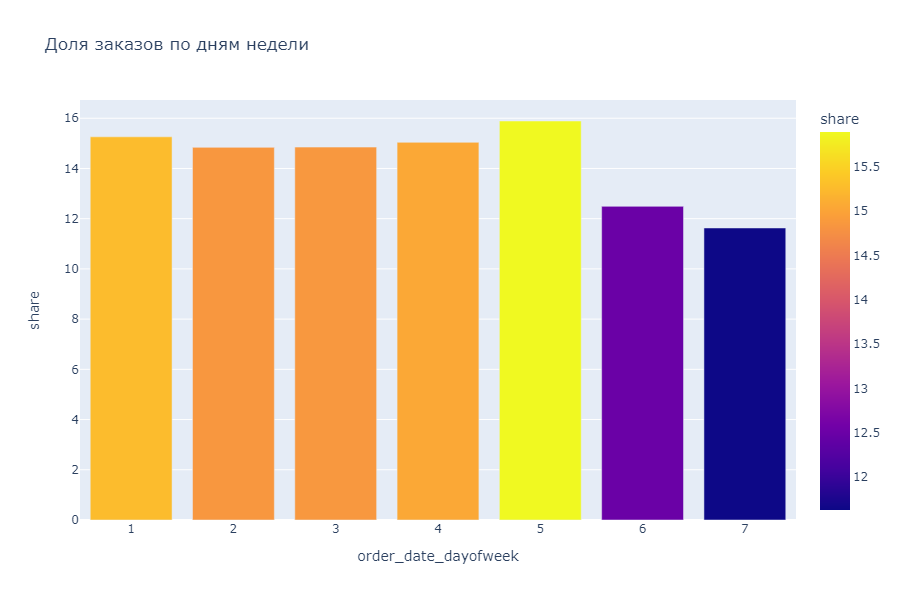

In [13]:
import pandas as pd; import numpy as np
# Step: Extract datetime attribute(s) day of week number from 'order_date'
df['order_date_dayofweek'] = df['order_date'].dt.dayofweek + 1

import pandas as pd; import numpy as np
# Step: Group by and aggregate
df_dw = df.groupby(['order_date_dayofweek']).agg(phone_size=('phone', 'size')).reset_index()

# Step: Rename column
df_dw = df_dw.rename(columns={'phone_size': 'cnt'})
df_dw['share'] = round((df_dw.cnt / df_dw.cnt.sum()*100), 2)

import plotly.express as px
fig = px.bar(df_dw, x='order_date_dayofweek', y='share', color='share', title='Доля заказов по дням недели', width=900, height=600)
fig

## Доля заказов по часам регистрации <a class='anchor' id='Доля_заказов_по_часам_регистрации'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


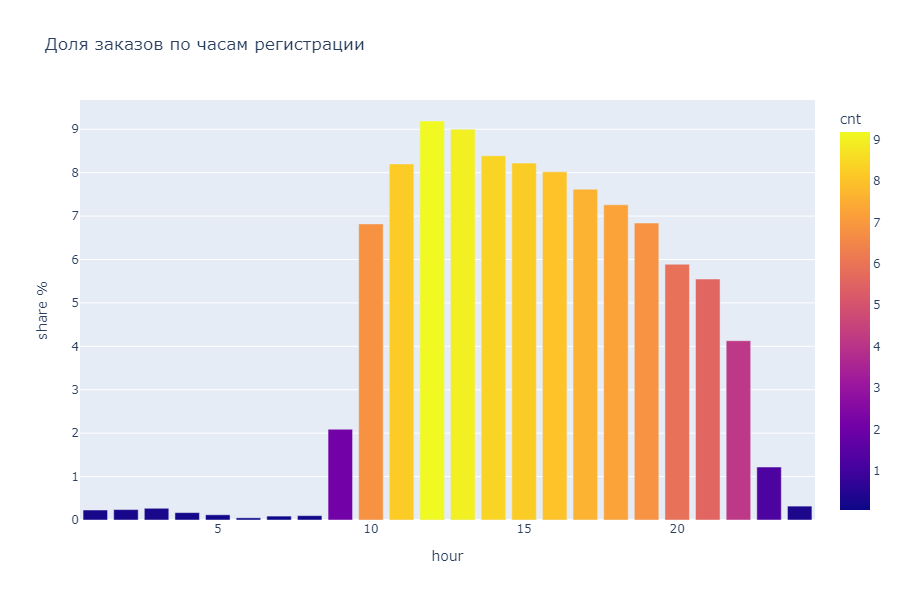

In [14]:
df['order_date_hour'] = df['order_date'].dt.hour + 1
df_h = df.groupby('order_date_hour', as_index=False).phone.count()
import pandas as pd; import numpy as np
# Step: Rename column
df_h = df_h.rename(columns={'phone': 'cnt'})

df_h.cnt = round((df_h.cnt / df_h.cnt.sum()*100), 2)

import plotly.express as px
fig = px.bar(df_h, x='order_date_hour', y='cnt', color='cnt', title='Доля заказов по часам регистрации', width=900, height=600)
fig.update_xaxes(title_text='hour')
fig.update_yaxes(title_text='share %')
fig

## Задержка между днем заказа и днем исполнения <a class='anchor' id='Задержка_между_днем_заказа_и_днем_исполнения'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


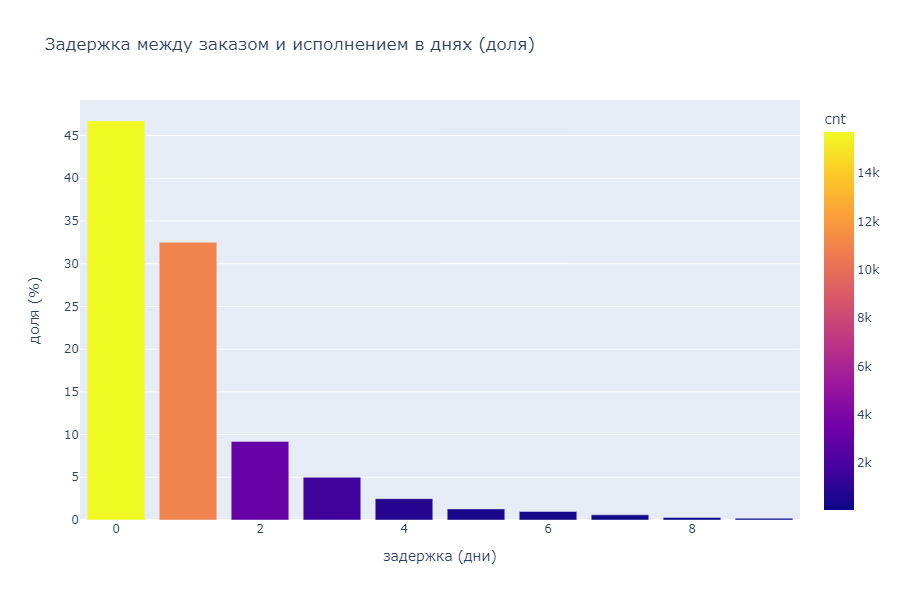

In [15]:
df_delay = df
import pandas as pd; import numpy as np
# Step: Select columns
df_delay = df_delay[['delivery_date', 'order_date']]

df_delay['order_date_1'] = df_delay.order_date.astype('datetime64[D]')
import pandas as pd; import numpy as np
# Step: Drop columns
df_delay = df_delay.drop(columns=['order_date'])

# Step: Rename column
df_delay = df_delay.rename(columns={'order_date_1': 'order_date'})
df_delay = df_delay.dropna()
df_delay['delivery_date'] = pd.to_datetime(df_delay['delivery_date'], format='%d.%m.%Y')
df_delay
df_delay['delay_d'] = (df_delay.delivery_date - df_delay.order_date).dt.days
df_delay_plt = df_delay.groupby('delay_d', as_index=False).delivery_date.count()\
    .query('delay_d >= 0').rename(columns={'delivery_date':'cnt'})
df_delay_plt['share'] = round((df_delay_plt.cnt / df_delay_plt.cnt.sum()*100), 1)
df_delay_plt = df_delay_plt.query('share > 0.1') # задержка больше 1% по доле в заказах
import plotly.express as px
fig = px.bar(df_delay_plt, x='delay_d', y='share', color='cnt', title='Задержка между заказом и исполнением в днях (доля)', width=900, height=600)
fig.update_xaxes(title_text='задержка (дни)')
fig.update_yaxes(title_text='доля (%)')
fig


### **Вывод:**
* Максимальное кол-во заказов было в марте 2021 года – 1508
* Распределение кол-ва заказов по дням недели приблизительно одинаковое – от 11% до 16%
* Максимальное число заказов приходят в период с 9 до 20 часов в пике в 12 часов дня – 9%
* 47% клиентов получают заказ в день покупки, 32,5% - на следующий день, 9% - на третий, 5% - на четвертый, 2,5% - на пятый день, после заказа  


## Когортный анализ

## Удержание по месяцу на интервале полгода <a class='anchor' id='Удержание_по_месяцу_на_интервале_полгода'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


In [16]:
df_coh = df
import pandas as pd; import numpy as np
# Step: Select columns
df_coh = df[['price', 'order_date', 'phone']]

# Step: Drop missing values in [All columns]
df_coh = df_coh.dropna()

df_coh['first_order_mo'] = df_coh.groupby('phone').order_date.transform('min').astype('datetime64[M]')
df_coh['order_mo'] = df_coh.order_date.astype('datetime64[M]')
df_coh['coh_size'] = df_coh.groupby('first_order_mo').phone.transform('nunique')
# номер когорты
df_coh['rn_coh'] = df_coh.first_order_mo.rank(method='dense').astype(int)
df_coh = df_coh.sort_values(by=['order_mo', 'first_order_mo'], ascending=[True, True])



In [17]:
# подсчет пользователей в когорте и последующих месяцах
df_coh['cnt'] = df_coh.groupby(['first_order_mo', 'order_mo', 'rn_coh']).phone\
    .transform('nunique')
df_coh = df_coh.sort_values(by=['first_order_mo', 'order_mo', 'rn_coh'], ascending=[True, True, True])
df_coh_cnt = df_coh.drop(columns=['price', 'order_date', 'phone'])
df_coh_cnt = df_coh_cnt.drop_duplicates(keep='first')

# Step: Sort column(s) first_order_mo ascending (A-Z), order_mo ascending (A-Z), coh_size ascending (A-Z)
df_coh_cnt = df_coh_cnt.sort_values(by=['first_order_mo', 'order_mo', 'rn_coh'], ascending=[True, True, True])


df_coh_cnt['ret_rate'] = round((df_coh_cnt.cnt / df_coh_cnt.coh_size) * 100, 2)
df_coh_cnt['rn'] = df_coh_cnt.groupby('coh_size').order_mo.rank().astype(int)
df_coh_cnt['mo_cnt'] = df_coh_cnt.groupby('coh_size').rn.transform('count')
df_coh_cnt = df_coh_cnt.query(f'rn in {list(range(7))} and mo_cnt > 5')
df_coh_cnt['fomo'] = df_coh_cnt.first_order_mo.astype(str)


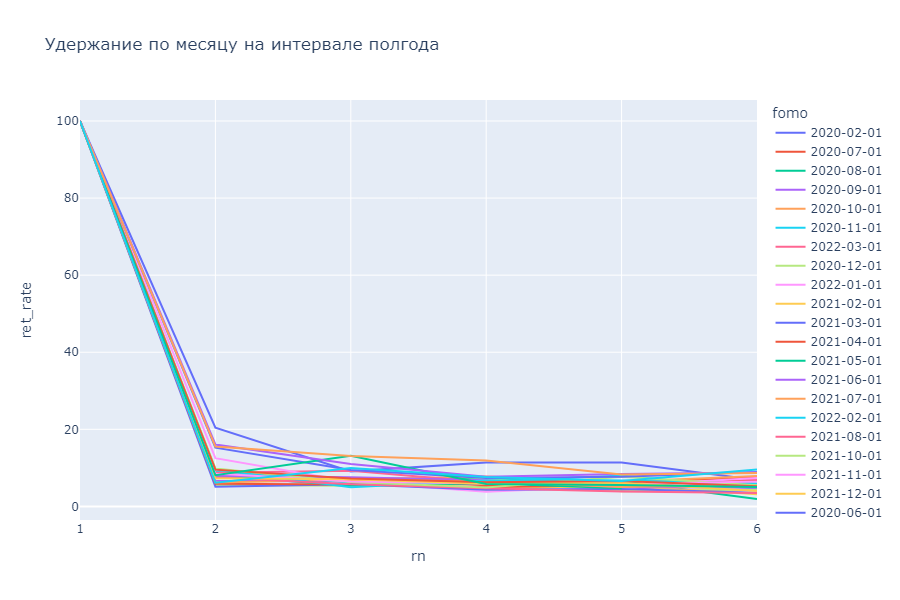

In [18]:
import plotly.express as px
fig = px.line(df_coh_cnt.sort_values(by=['rn'], ascending=[True]), x='rn', y='ret_rate', color='fomo', title='Удержание по месяцу на интервале полгода', width=900, height=600)
fig

## Среднее держание по месяцу на интервале полгода по всем когортам <a class='anchor' id='Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


In [19]:
df_coh_cnt_mean = df_coh_cnt.groupby('rn', as_index=False).ret_rate.mean().round(2)
import pandas as pd; import numpy as np
# Step: Rename column
df_coh_cnt_mean = df_coh_cnt_mean.rename(columns={'rn': 'mo'})



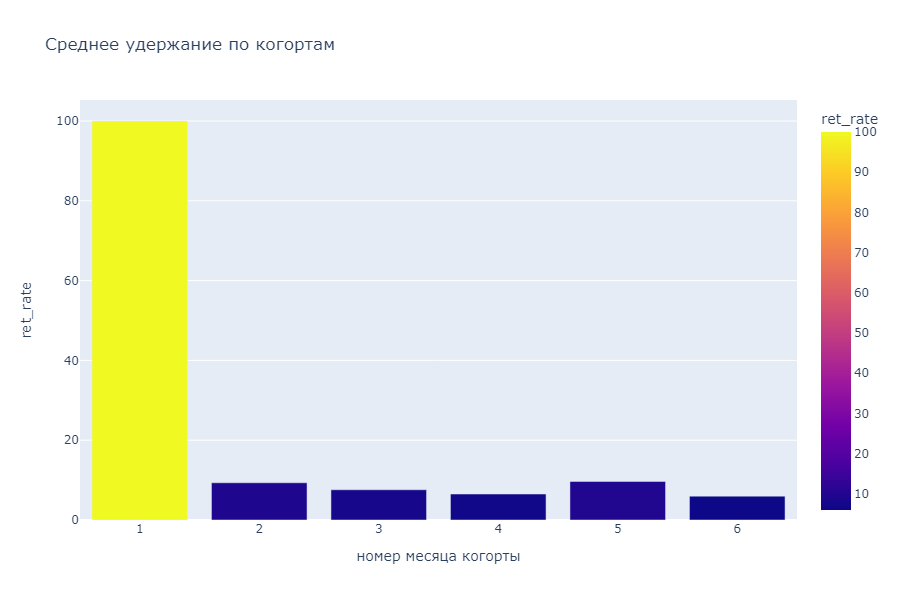

In [20]:
import plotly.express as px
fig = px.bar(df_coh_cnt_mean, x='mo', y='ret_rate', color='ret_rate', title='Среднее удержание по когортам', width=900, height=600)
fig.update_xaxes(title_text='номер месяца когорты')
fig

## Сводное удержание по когортам <a class='anchor' id='Сводное_удержание_по_когортам'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


In [41]:
# df_coh_cnt

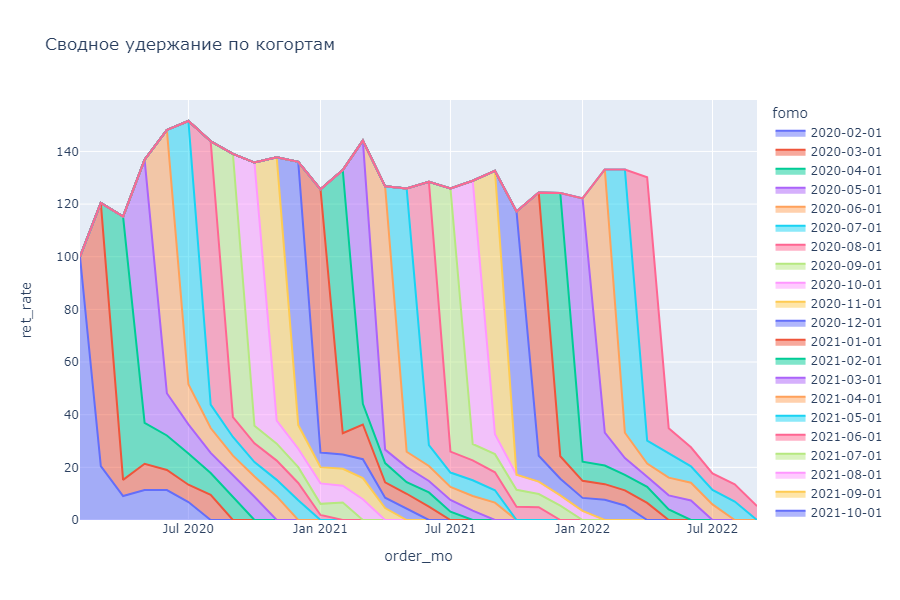

In [22]:
# fomo - first order mo, месяц старта когорты
import plotly.express as px
fig = px.area(df_coh_cnt, x='order_mo', y='ret_rate', color='fomo', title='Сводное удержание по когортам', width=900, height=600)
fig

## LTV, 6 месяцев <a class='anchor' id='LTV,_6_месяцев'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


In [23]:
# сумма в когорте и дальнейших месяцах
df_coh_ltv = df_coh.groupby(['first_order_mo', 'order_mo', 'rn_coh'], as_index=False)\
    .agg({'price':'sum'})

df_coh_ltv = df_coh_ltv.sort_values(by=['first_order_mo', 'order_mo'], ascending=[True, True])

# накопительная сумма
df_coh_ltv['ltv'] = df_coh_ltv.groupby(['rn_coh'])\
    .price.cumsum()
# нумерация месяцев внутри когорт
df_coh_ltv['rn_mo'] = df_coh_ltv.groupby('rn_coh').order_mo.rank().astype(int)
df_coh_ltv['fomo'] = df_coh_ltv.first_order_mo.astype(str)
# подсчет кол-ва месяцев жизни когорт
df_coh_ltv['mo_cnt'] = df_coh_ltv.groupby('rn_coh').rn_mo.transform('count')

# обрезка времени жизни когорт до 6 месяцев
df_coh_ltv_period = df_coh_ltv.query(f'rn_mo in {list(range(7))} and mo_cnt > 5')


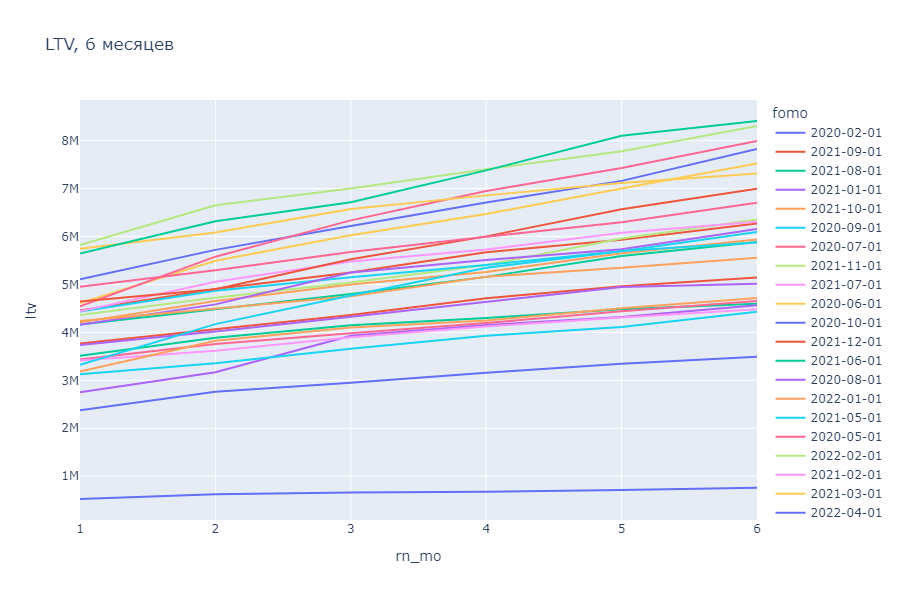

In [24]:
import plotly.express as px
fig = px.line(df_coh_ltv_period.sort_values(by=['rn_mo'], ascending=[True]),\
              x='rn_mo', y='ltv', color='fomo', title='LTV, 6 месяцев', width=900, height=600)
fig

## Накопление по когортам <a class='anchor' id='Накопление_по_когортам'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


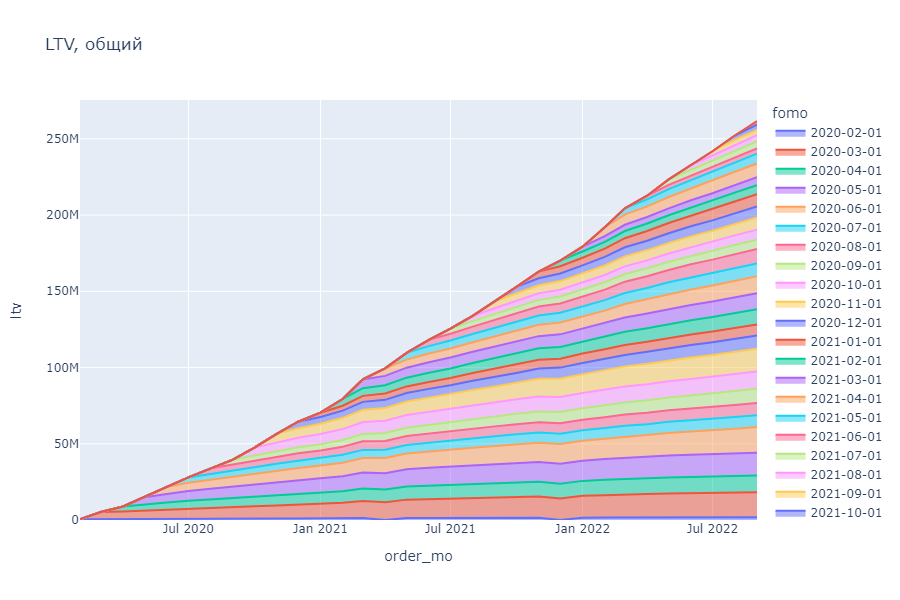

In [25]:
import plotly.express as px
fig = px.area(df_coh_ltv, x='order_mo', y='ltv', color='fomo', title='LTV, общий', width=900, height=600)
fig

### **Вывод:**
* Удержание имеет слабую повышательную тенденцию в историческом периоде
* На второй месяц удержание составляет в среднем 9,3% со всплеском на пятом месяце до 9,7%


## Постоянные клиенты

## Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке <a class='anchor' id='Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


Постоянные клиенты - те, кто покупает минимум 2 раза в квартал

In [26]:
df = df[['price', 'phone', 'order_date']]
df['mo'] = df.order_date.astype('datetime64[M]')
df = df.sort_values(by=['mo', 'price'], ascending=[True, True])

In [27]:
df = df.query('price != 0').dropna()
df['day'] = df.order_date.astype('datetime64[D]')
df['day_cnt'] = df.groupby(['day', 'phone']).price.transform('count')

df = df.drop_duplicates(keep='first')

df['mo_cnt'] = df.groupby(['mo', 'phone']).day_cnt.transform('sum')
df['mo_price'] = df.groupby(['mo', 'phone']).price.transform('sum')

# df_reg = df.query('mo < "2020-06-01"')
df_reg = df

df_reg = df_reg.drop(columns=['day', 'day_cnt', 'price'])
df_reg = df_reg.drop_duplicates(keep='first')

In [28]:
begin = df.order_date.min().replace(day=1, hour=0, minute=0)

end = df.order_date.max()\
    .replace(day=(monthrange(df.order_date.max().year, df.order_date.max().month))[1], hour=23, minute=59, second=59)


cal = pd.DataFrame(pd.date_range(begin, end, freq='MS'))

import pandas as pd; import numpy as np
cal.columns = [str(column) for column in cal.columns]
cal = cal.rename(columns={'0': 'mo'})

In [29]:
start = time.time()
df_reg_status = pd.DataFrame()
for i in df_reg.phone.unique():
    # получение помесячной динамики заказов для каждого клиента
    interim = df_reg.loc[df_reg.phone == i].merge(cal, on='mo', how='right')
    interim.mo_cnt = interim.mo_cnt.fillna(0).astype(int)
    interim.phone = interim.phone.fillna(i)
    interim = interim.sort_values('mo')
    interim['roll_mean'] = interim.mo_cnt.rolling(3).mean().fillna(0).round(2)
    interim.loc[(interim.roll_mean >= 0.66) | (interim.mo_cnt >= 2), 'reg'] = 1
#     interim.loc[interim.mo_cnt >= 2, 'reg'] = 1
    interim.reg = interim.reg.fillna(0)
    df_reg_status = pd.concat([df_reg_status, interim], ignore_index=True)
# print(time.time() - start)    

df_reg_status = df_reg_status.dropna().drop_duplicates(keep='first')
# df_reg_status

In [30]:
df_reg_status['cnt'] = df_reg_status.groupby(['mo', 'reg']).phone.transform('count')
df_reg_status['rev'] = df_reg_status.groupby(['mo', 'reg']).mo_price.transform('sum')
df_reg_status['tot_cnt'] = df_reg_status.groupby(['mo']).phone.transform('count')
df_reg_status['tot_rev'] = df_reg_status.groupby(['mo']).mo_price.transform('sum')
df_reg_status['cnt_share'] = (df_reg_status.cnt / df_reg_status.tot_cnt).round(4)
df_reg_status['rev_share'] = (df_reg_status.rev / df_reg_status.tot_rev).round(4)
df_reg_status = df_reg_status.query('reg == 1')
import pandas as pd; import numpy as np
# Step: Select columns
df_reg_status = df_reg_status[['mo', 'cnt_share', 'rev_share']]
df_reg_status['threshold'] = 1

# Step: Drop duplicates based on ['mo', 'cnt_share', 'rev_share']
df_reg_status = df_reg_status.drop_duplicates(keep='first')

# Step: Sort column(s) mo ascending (A-Z)
df_reg_status = df_reg_status.sort_values(by=['mo'], ascending=[True])

df_reg_status['reg_quality'] = (df_reg_status.rev_share / df_reg_status.cnt_share).round(4)


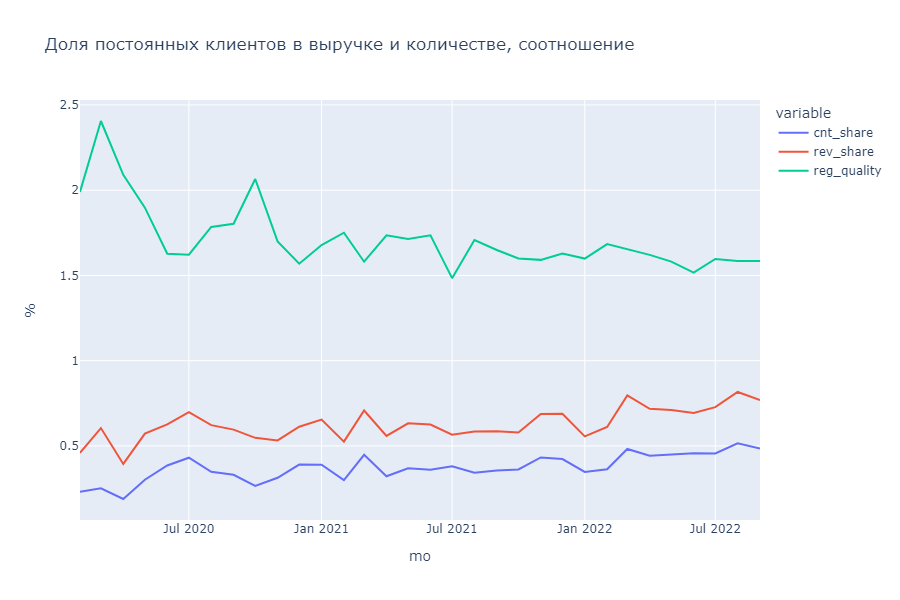

In [31]:
import plotly.express as px
fig = px.line(df_reg_status.sort_values(by=['mo'], ascending=[True])\
              ,x='mo', y=['cnt_share', 'rev_share', 'reg_quality']\
              , title='Доля постоянных клиентов в выручке и количестве, соотношение', width=900, height=600)
fig.update_yaxes(title_text='%')
fig

## DAU, WAU, MAU, Sticky Factor <a class='anchor' id='DAU,_WAU,_MAU,_Sticky_Factor'></a>

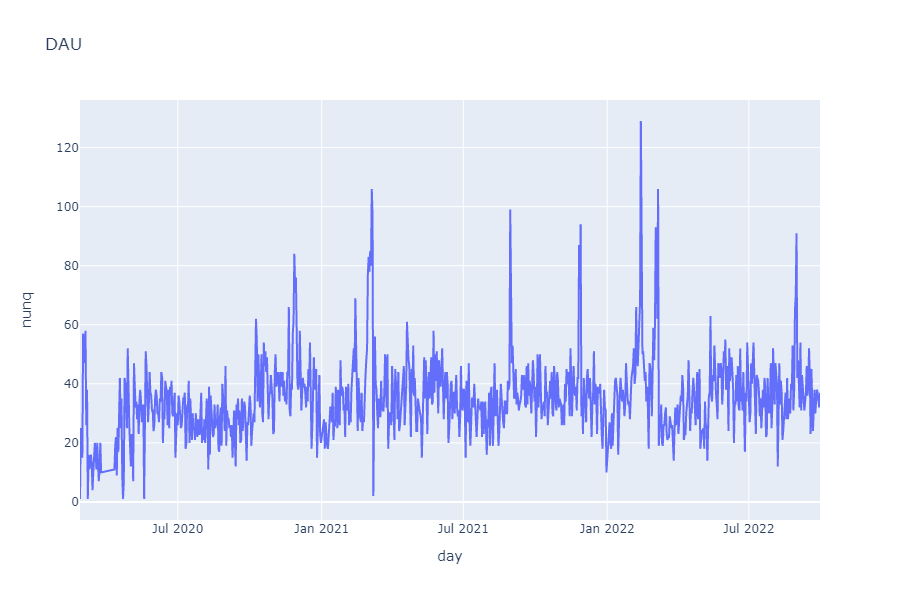

In [32]:
df_dwm = df[['price', 'phone', 'day']].sort_values('day')
df_dwm
df_dau = df_dwm.groupby('day', as_index=False).phone.nunique()
import pandas as pd; import numpy as np
# Step: Rename column
df_dau = df_dau.rename(columns={'phone': 'nunq'})

import plotly.express as px
fig = px.line(df_dau.sort_values(by=['day'], ascending=[True]), x='day', y='nunq', title='DAU')
fig

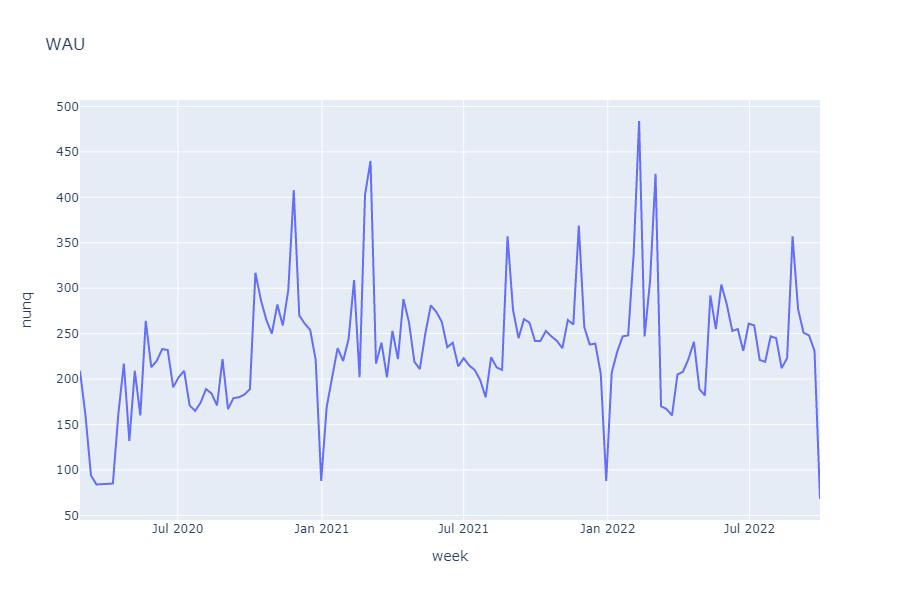

In [33]:
df_dwm['week'] = df_dwm.day.astype('datetime64[W]')
df_wau = df_dwm.groupby('week', as_index=False).phone.nunique()
import pandas as pd; import numpy as np
# Step: Rename column
df_wau = df_wau.rename(columns={'phone': 'nunq'})

import plotly.express as px
fig = px.line(df_wau.sort_values(by=['week'], ascending=[True]), x='week', y='nunq', title='WAU')
fig

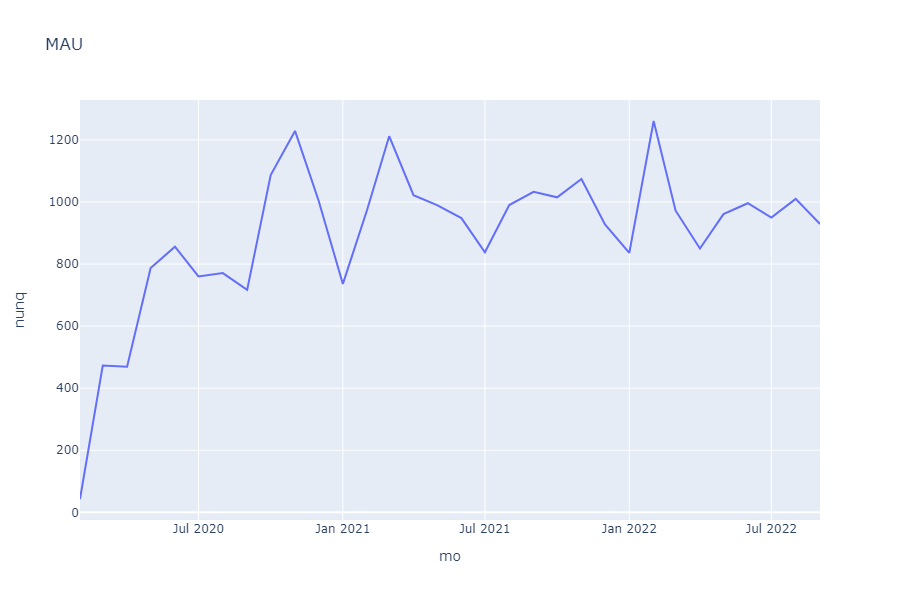

In [34]:
df_dwm['mo'] = df_dwm.day.astype('datetime64[M]')
df_mau = df_dwm.groupby('mo', as_index=False).phone.nunique()
import pandas as pd; import numpy as np
# Step: Rename column
df_mau = df_mau.rename(columns={'phone': 'nunq'})

import plotly.express as px
fig = px.line(df_mau.sort_values(by=['mo'], ascending=[True]), x='mo', y='nunq', title='MAU')
fig

In [35]:
df_dwm = df_dwm.query('day > "2020-04-11"')  # имеется пробел в данных
df_dwm['day_nunq_cnt'] = df_dwm.groupby('day').phone.transform('nunique')
df_dwm['week_nunq_cnt'] = df_dwm.groupby('week').phone.transform('nunique')
df_dwm['mo_nunq_cnt'] = df_dwm.groupby('mo').phone.transform('nunique')
df_dwm['d_w'] = df_dwm.day_nunq_cnt / df_dwm.week_nunq_cnt
df_dwm['d_m'] = df_dwm.day_nunq_cnt / df_dwm.mo_nunq_cnt
df_dwm['w_m'] = df_dwm.week_nunq_cnt / df_dwm.mo_nunq_cnt


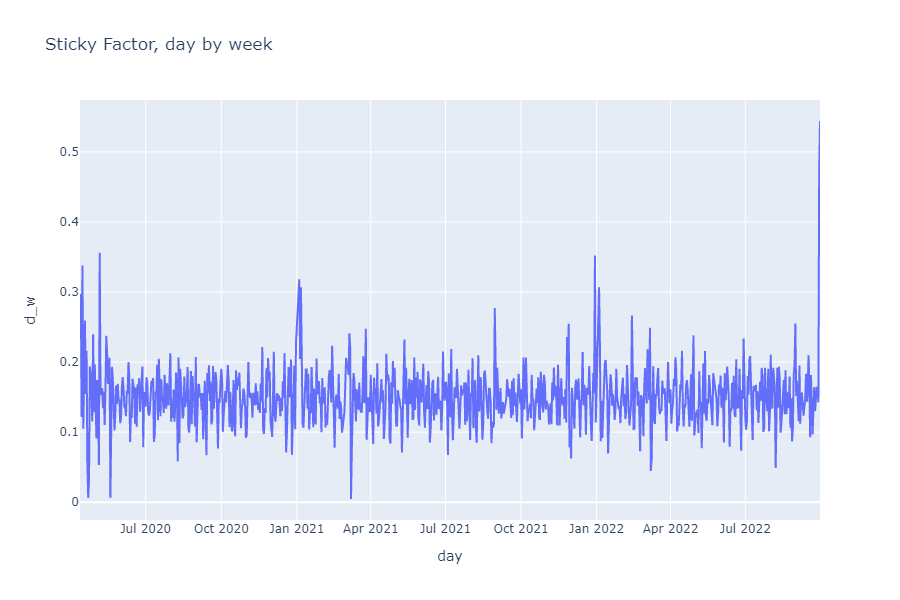

In [36]:
df_dw = df_dwm[['day', 'week', 'd_w']].drop_duplicates()
import plotly.express as px
fig = px.line(df_dw.sort_values(by=['day'], ascending=[True]), x='day', y='d_w', title='Sticky Factor, day by week')
fig

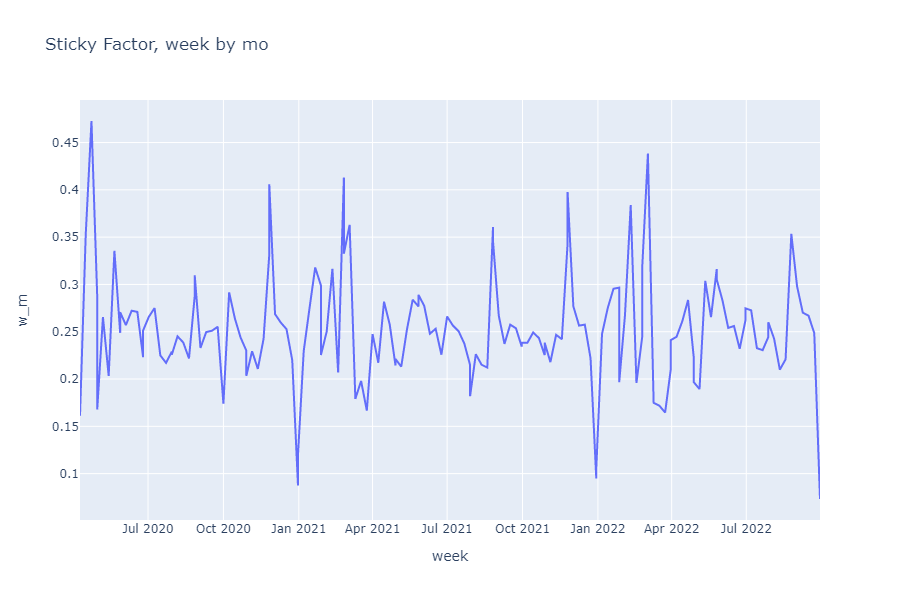

In [37]:
df_wm = df_dwm[['week', 'mo', 'w_m']].drop_duplicates()
import plotly.express as px
fig = px.line(df_wm.sort_values(by=['week'], ascending=[True]), x='week', y='w_m', title='Sticky Factor, week by mo')
fig

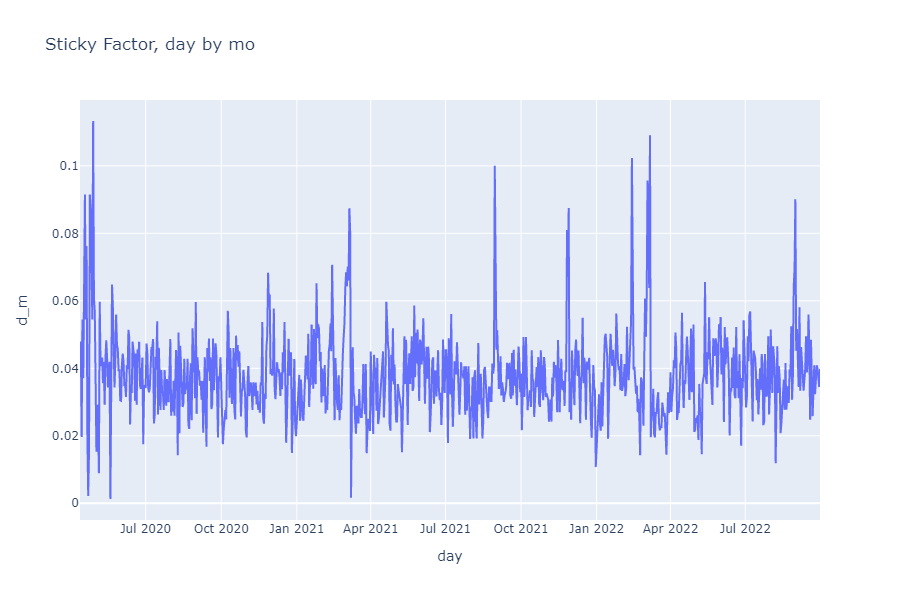

In [38]:
df_dm = df_dwm[['day', 'mo', 'd_m']].drop_duplicates()
import plotly.express as px
fig = px.line(df_dm.sort_values(by=['day'], ascending=[True]), x='day', y='d_m', title='Sticky Factor, day by mo')
fig

## Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе за последние 3 месяца <a class='anchor' id='Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_за_последние_3_месяца'></a>

* [Кол-во заказов по станциям метро](#Кол-во_заказов_по_станциям_метро)
* [Выручка по станциям метро](#Выручка_по_станциям_метро)
* [Доля заказов по станциям метро, %](#Доля_заказов_по_станциям_метро,_%)
* [Доля выручки по станциям метро, %](#Доля_выручки_по_станциям_метро,_%)
* [Перспективные станции](#Перспективные_станции)
* [Кол-во заказов в месяц](#Кол-во_заказов_в_месяц)
* [Доля заказов по дням недели](#Доля_заказов_по_дням_недели)
* [Доля заказов по часам регистрации](#Доля_заказов_по_часам_регистрации)
* [Задержка между днем заказа и днем исполнения](#Задержка_между_днем_заказа_и_днем_исполнения)
* [Удержание по месяцу на интервале полгода](#Удержание_по_месяцу_на_интервале_полгода)
* [Среднее держание по месяцу на интервале полгода по всем когортам](#Среднее_держание_по_месяцу_на_интервале_полгода_по_всем_когортам)
* [Сводное удержание по когортам](#Сводное_удержание_по_когортам)
* [LTV, 6 месяцев](#LTV,_6_месяцев)
* [Накопление по когортам](#Накопление_по_когортам)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе на всем историческом промежутке](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_на_всем_историческом_промежутке)
* [Доля постояннах клиентов в количестве vs доли постоянных клиентов в доходе нза последние 3 месяца](#Доля_постояннах_клиентов_в_количестве_vs_доли_постоянных_клиентов_в_доходе_нза_последние_3_месяца)
* [DAU, WAU, MAU, Sticky Factor](#DAU,_WAU,_MAU,_Sticky_Factor)


In [39]:
df = df[['price', 'phone', 'order_date']]
df['mo'] = df.order_date.astype('datetime64[M]')
df = df.sort_values(by=['mo', 'price'], ascending=[True, True])


df['day'] = df.order_date.astype('datetime64[D]')
df['day_cnt'] = df.groupby(['day', 'phone']).price.transform('count')

df = df.drop_duplicates(keep='first')

df['mo_cnt'] = df.groupby(['mo', 'phone']).day_cnt.transform('sum')
df['mo_price'] = df.groupby(['mo', 'phone']).price.transform('sum')

df_reg = df.query('price != 0 and mo >= "2022-03-01"').dropna()

df_reg = df_reg.drop(columns=['day', 'day_cnt', 'price'])
df_reg = df_reg.drop_duplicates(keep='first')

begin = df.order_date.min().replace(day=1, hour=0, minute=0)

end = df.order_date.max()\
    .replace(day=(monthrange(df.order_date.max().year, df.order_date.max().month))[1], hour=23, minute=59, second=59)


cal = pd.DataFrame(pd.date_range(begin, end, freq='MS'))

import pandas as pd; import numpy as np
cal.columns = [str(column) for column in cal.columns]
cal = cal.rename(columns={'0': 'mo'})

# start = time.time()
df_reg_status = pd.DataFrame()
for i in df_reg.phone.unique():
    # получение помесячной динамики заказов для каждого клиента
    interim = df_reg.loc[df_reg.phone == i].merge(cal, on='mo', how='right')
    interim.mo_cnt = interim.mo_cnt.fillna(0).astype(int)
    interim.phone = interim.phone.fillna(i)
    interim = interim.sort_values('mo')
    interim['roll_mean'] = interim.mo_cnt.rolling(3).mean().fillna(0).round(2)
    interim.loc[(interim.roll_mean >= 0.66) | (interim.mo_cnt >= 2), 'reg'] = 1
#     interim.loc[interim.mo_cnt >= 2, 'reg'] = 1
    interim.reg = interim.reg.fillna(0)
    df_reg_status = pd.concat([df_reg_status, interim], ignore_index=True)
# print(time.time() - start)    

df_reg_status = df_reg_status.dropna().drop_duplicates(keep='first')
df_reg_status

df_reg_status['cnt'] = df_reg_status.groupby(['mo', 'reg']).phone.transform('count')
df_reg_status['rev'] = df_reg_status.groupby(['mo', 'reg']).mo_price.transform('sum')
df_reg_status['tot_cnt'] = df_reg_status.groupby(['mo']).phone.transform('count')
df_reg_status['tot_rev'] = df_reg_status.groupby(['mo']).mo_price.transform('sum')
df_reg_status['cnt_share'] = (df_reg_status.cnt / df_reg_status.tot_cnt).round(4)
df_reg_status['rev_share'] = (df_reg_status.rev / df_reg_status.tot_rev).round(4)
df_reg_status = df_reg_status.query('reg == 1')
import pandas as pd; import numpy as np
# Step: Select columns
df_reg_status = df_reg_status[['mo', 'cnt_share', 'rev_share']]
df_reg_status['threshold'] = 1

# Step: Drop duplicates based on ['mo', 'cnt_share', 'rev_share']
df_reg_status = df_reg_status.drop_duplicates(keep='first')

# Step: Sort column(s) mo ascending (A-Z)
df_reg_status = df_reg_status.sort_values(by=['mo'], ascending=[True])

df_reg_status['reg_quality'] = (df_reg_status.rev_share / df_reg_status.cnt_share).round(4)


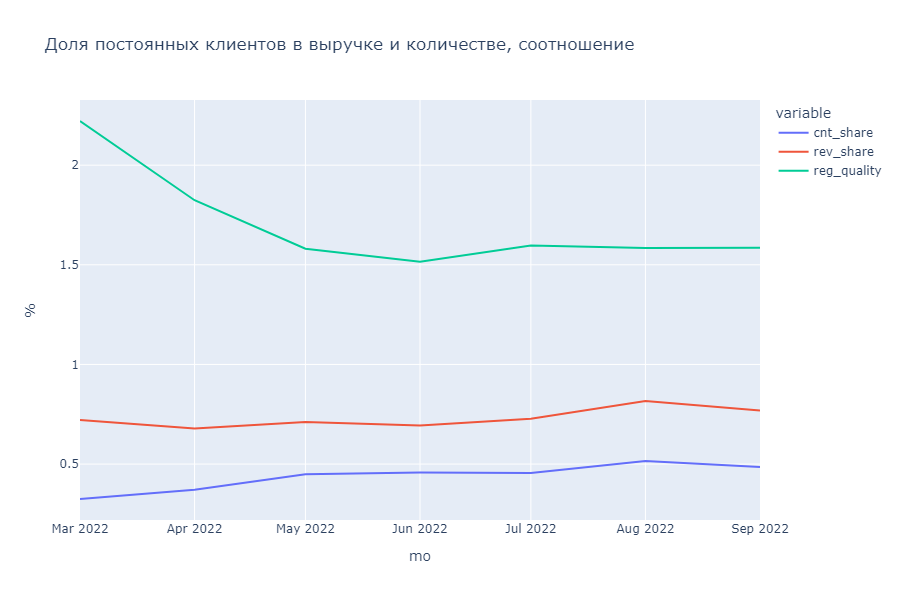

In [40]:
import plotly.express as px
fig = px.line(df_reg_status.sort_values(by=['mo'], ascending=[True])\
              ,x='mo', y=['cnt_share', 'rev_share', 'reg_quality']\
              , title='Доля постоянных клиентов в выручке и количестве, соотношение', width=900, height=600)
fig.update_yaxes(title_text='%')
fig

### **Вывод:**
* Постоянные клиенты постоянно превышают как по выручке, так и по количеству непостоянных с коеэффициентом отношения сооответствующих долей в пределах в среднем от 1,5 до 2 со всплеском 2,4 в марте 2020г.

## **Общий вывод:**

**География (станции метро)**

* Максимальная выручка поступает от клиентов у станции метро «Улица 1905 года», как наибольшее число клиентов
* ***Лучшие показатели по кол-ву клиентов и выручке у клиентов - на следующих станциях метро***: *`Народное Ополчение, Проспект Ветеранов, Спортивная, Смоленская, Октябрьская, Минская, Славянский бульвар, Кропоткинская, Улица 1905 года, Сухаревская, Сходненская, Филёвский парк, Чеховская, Домодедовская, Новаторская, Щукинская, Краснопресненская, Алексеевская, Тверская, Полянка, Маяковская, Выставочная, Воробьёвы горы, Крылатское, Шаболовская, Арбатская, Ботанический сад, Жулебино, Менделеевская, Беговая, ВДНХ, Киевская, Савёловская, Парк культуры, Фрунзенская, Проспект Вернадского, Павелецкая, Парк Победы, Багратионовская, Строгино, Международная, Ломоносовский проспект, Трубная, Таганская, Тульская, Студенческая, Деловой центр, Первомайская, Красные Ворота, Шелепиха, Пушкинская, Аэропорт, Бауманская, Университет, Раменки`*

**Кол-во заказов и частота**

* Максимальное кол-во заказов было в марте 2021 года – 1508
* Распределение кол-ва заказов по дням недели приблизительно одинаковое – от 11% до 16%
* Максимальное число заказов приходят в период с 9 до 20 часов в пике в 12 часов дня – 9%
* 47% клиентов получают заказ в день покупки, 32,5% - на следующий день, 9% - на третий, 5% - на четвертый, 2,5% - на пятый день, после заказа  

**Когорты**

* Удержание имеет слабую повышательную тенденцию в историческом периоде
* На второй месяц удержание составляет в среднем 9,3% со всплеском на пятом месяце до 9,7%

**Постояныее / непостоянные клиенты**

* Постоянные клиенты постоянно превышают как по выручке, так и по количеству непостоянных с коеэффициентом отношения сооответствующих долей в пределах в среднем от 1,5 до 2 со всплеском 2,4 в марте 2020г.


## **Рекомендации:**
Большая часть клиентов теряется уже на втором месяце, хотя и возвращается в следующих. Качество потоянных клиентов выше в разрезе выручки. Необходимы меры для удержания постоянных клиентов и увеличения их доли.